# Bayesian Inference: Fish Task

Participants observe a sequence of coloured fish and must infer which of three
ponds the fish were drawn from. Each pond contains fish in a fixed 80–10–10
colour ratio. The single parameter `lambda` governs how quickly beliefs about the pondupdate as new fish are observed: lower values make observations less predictive, so more confirming evidence is required to gain confidence and reduce uncertainty.

In [1]:
import numpy as np
from pyem import EMModel
from pyem.models.bayes import bayes_sim, bayes_fit
from pyem.utils.math import norm2alpha

In [2]:
# simulate computer agents completing the fish task
nsubjects, nblocks, ntrials = 50, 6, 15
true_lambda = np.random.uniform(0.2, 0.8, size=(nsubjects, 1))

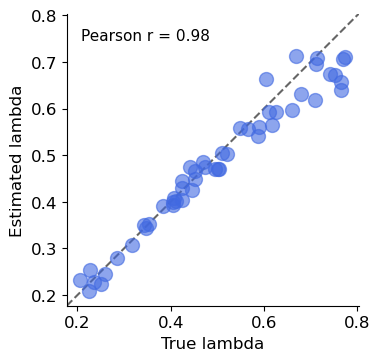

In [3]:
# fit and recover
model = EMModel(all_data=None, 
                fit_func=bayes_fit, 
                param_names=["lambda"], 
                param_xform=[norm2alpha], 
                simulate_func=bayes_sim
                )

recovery = model.recover(true_lambda, 
                         pr_inputs=['choices','observations'], 
                         nblocks=nblocks, ntrials=ntrials
                         )

# scatter plot of recovered parameters
fig = model.plot_recovery(recovery)